### Homework 4 Parameter estimate with ML
Using maximum likelihood estimation method to find the probability distribution function  
f(x|a,b)=x0+ax+bx2 which best describes the following dataset.

https://canvas.uw.edu/files/138989373/download?download_frd=1

In this parameterization, x 0 is a function of ( a , b ) and it normalizes the PDF f ( x | a , b ) within range x:[-1,1]. Find negative log likelihood value like we did in class but for ( a , b ) . Use dataset above as data point. Following tutorial of the iminuit package below to obtain the best likelihood fit results. The iMinuit is very sensitive to the beginning parameter values and the range of each parameter.

 https://iminuit.readthedocs.io/en/stable/notebooks/cost_functions.html

 Project data into a historam with range x:[-1, 1] and bin width 0.1. Draw statistical uncertainty as vertical bar in each bin. Superpose PDF based on the best fit value from 1. Draw the contour of negative log liklihood − 2 l n L as function of ( a , b ) . Results might look similar to following (Adjust ranges in a and b to appropriate range for − 2 Δ l n L + 2 ).

In [ ]:
##Homework 4 Parameter estimate with ML
## Using maximum likelihood estimation method to find the probability distribution function   f(x|a,b)=x0+ax+bx2 which best describes the following dataset.

## https://canvas.uw.edu/files/138989373/download?download_frd=1 (csv file)

## In this parameterization, x 0 is a function of ( a , b ) and it normalizes the PDF f ( x | a , b ) within range x:[-1,1]. Find negative log likelihood value like we did in class but for ( a , b ) . Use dataset above as data point. Following tutorial of the iminuit package below to obtain the best likelihood fit results. The iMinuit is very sensitive to the beginning parameter values and the range of each parameter.

## https://iminuit.readthedocs.io/en/stable/notebooks/cost_functions.html

## Project data into a historam with range x:[-1, 1] and bin width 0.1. Draw statistical uncertainty as vertical bar in each bin. Superpose PDF based on the best fit value from 1. Draw the contour of negative log liklihood − 2 l n L as function of ( a , b ) . Results might look similar to following (Adjust ranges in a and b to appropriate range for − 2 Δ l n L + 2 ).



Best-fit: a = 0.2024, b = -0.0019
Minimum -2lnL = 1329.1698


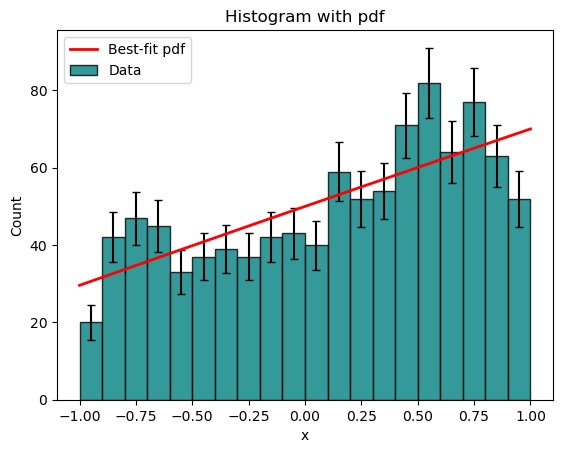

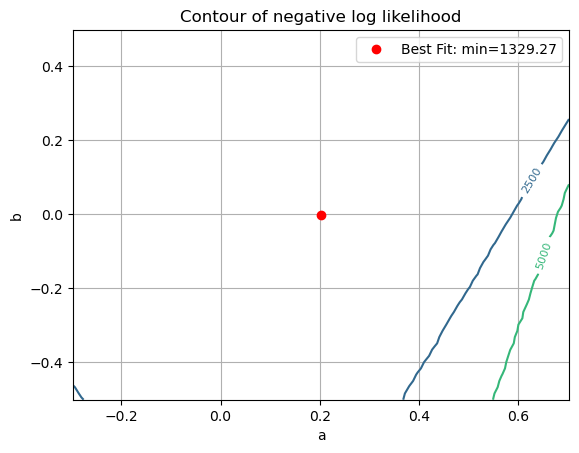

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import Minuit


# Load data from csv file
df = pd.read_csv("data_homework4.csv")
xdata = df.iloc[:, 0].dropna().to_numpy() # data in column 0

# Keep only points within [-1, 1]
xdata = xdata[(xdata >= -1) & (xdata <= 1)] # filter data

# Define PDF function
def pdf(x, a, b):
    x0 = 0.5 * (1 - (2 * b) / 3) # normalization constant
    f = x0 + a * x + b * x**2
    return np.clip(f, 1e-12, None) 

# define negative log likelihood function 
def nll(a, b, data=xdata):
    return -2 * np.sum(np.log(pdf(data, a, b))) 

# fit using iminuit from the example given
m = Minuit(lambda a, b: nll(a, b, xdata), a=0, b=0) # initial parameter vals
m.limits = [(-2, 2), (-2, 2)] # parameter limits
m.migrad() # minimize the negative log likelihood
m.hesse() # calculate uncertainties for parameters

a_best, b_best = m.values["a"], m.values["b"] # best fit parameters
print(f"Best-fit: a = {a_best:.4f}, b = {b_best:.4f}")
print(f"Minimum -2lnL = {m.fval:.4f}")

# Step 5: Histogram with pdf overlaying 
bins = np.arange(-1, 1.1, 0.1)
counts, edges = np.histogram(xdata, bins=bins)
centers = 0.5 * (edges[1:] + edges[:-1])
errors = np.sqrt(counts)

x_plot = np.linspace(-1, 1, 200) 
y_pdf = pdf(x_plot, a_best, b_best) # best fit pdf values
y_pdf_scaled = y_pdf * len(xdata) * 0.1  # scale to counts/bin

plt.bar(centers, counts, width=0.1, color="teal", edgecolor="black",alpha = .8,  label="Data")
plt.errorbar(centers, counts, yerr=errors, fmt="none", ecolor="black", capsize=3)
plt.plot(x_plot, y_pdf_scaled, "r-", lw=2, label="Best-fit pdf")
plt.xlabel("x")
plt.ylabel("Count")
plt.legend()
plt.title("Histogram with pdf")
plt.show()


# contour plot for negative log likelihood using similar method as we did in lab
# Create parameter grid
a_vals = np.linspace(a_best - 0.5, a_best + 0.5, 60)
b_vals = np.linspace(b_best - 0.5, b_best + 0.5, 60)

A, B = np.meshgrid(a_vals, b_vals)
Z = np.zeros_like(A)

# compute negative log likelihood for each grid point
for i in range(len(a_vals)):
    for j in range(len(b_vals)):
        Z[j, i] = nll(a_vals[i], b_vals[j], xdata)

# normalize to minimum
Z_min = np.min(Z)
Z -= Z_min  # Δ-2lnL

# plot our  contour
contours = plt.contour(A, B, Z,  levels=2, cmap="viridis") 
plt.clabel(contours, inline=1, fontsize=8)

# mark the minimum 
plt.plot(a_best, b_best, "ro", label=f"Best Fit: min={Z_min:.2f}")

plt.xlabel("a")
plt.ylabel("b")
plt.title("Contour of negative log likelihood")
plt.legend()
plt.grid(True)
plt.show()
